In [1]:
!cp "/content/drive/MyDrive/FDM Project/DDoSdata.csv" "/content"

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 300

In [3]:
df = pd.read_csv("DDoSdata.csv", low_memory=False)
df.head()

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,pkts,bytes,state,state_number,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1650261,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,80,10,1729,RST,1,1.528103e+09,20,6.406424,0.679473,0.544126,1.358946,0.135347,1.223599,6,4,963,766,1.404840,0.780467,0.468280,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1650262,1650262,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,80,10,1604,RST,1,1.528103e+09,21,6.405851,0.679572,0.544197,1.359144,0.135375,1.223769,6,4,838,766,1.404966,0.780536,0.468322,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1650263,1650263,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,80,8,1708,RST,1,1.528103e+09,22,6.401038,1.110847,1.110847,2.221694,0.000000,2.221694,5,3,1008,700,1.093573,0.624899,0.900214,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP
3,1650264,1650264,1.528103e+09,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,80,8,1462,RST,1,1.528103e+09,23,6.400703,1.113328,1.113328,2.226655,0.000000,2.226655,5,3,762,700,1.093630,0.624931,0.898208,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24986,1.21662,328,308,1,DDoS,HTTP
4,1650265,1650265,1.528103e+09,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,80,8,1296,RST,1,1.528103e+09,24,6.400472,1.113098,1.113098,2.226195,0.000000,2.226195,5,3,596,700,1.093669,0.624954,0.898394,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24991,1.21662,328,308,1,DDoS,HTTP


## EDA

Drop columns that represent 'id' and get dataset information

In [4]:
df.drop(['Unnamed: 0', 'pkSeqID'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927101 entries, 0 to 1927100
Data columns (total 45 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   stime                             float64
 1   flgs                              object 
 2   flgs_number                       int64  
 3   proto                             object 
 4   proto_number                      int64  
 5   saddr                             object 
 6   sport                             object 
 7   daddr                             object 
 8   dport                             object 
 9   pkts                              int64  
 10  bytes                             int64  
 11  state                             object 
 12  state_number                      int64  
 13  ltime                             float64
 14  seq                               int64  
 15  dur                               float64
 16  mean                              fl

Count number of null values in each column of dataset

In [5]:
df.isna().sum()

stime                               0
flgs                                0
flgs_number                         0
proto                               0
proto_number                        0
saddr                               0
sport                               0
daddr                               0
dport                               0
pkts                                0
bytes                               0
state                               0
state_number                        0
ltime                               0
seq                                 0
dur                                 0
mean                                0
stddev                              0
sum                                 0
min                                 0
max                                 0
spkts                               0
dpkts                               0
sbytes                              0
dbytes                              0
rate                                0
srate       

Drop some columns that have no role in definition of detecting a DDos attack

In [6]:
df.drop(['saddr', 'daddr', 'category', 'state', 'proto', 'flgs_number', 'stime', 
         'ltime', 'seq', 'mean', 'sum', 'proto_number', 'sport', 'dport'], axis=1, inplace=True)
df.head()

,flgs,pkts,bytes,state_number,dur,stddev,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,subcategory
0,e,10,1729,1,6.406424,0.544126,0.135347,1.223599,6,4,963,766,1.404840,0.780467,0.468280,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.56093,1.21662,328,308,1,HTTP
1,e,10,1604,1,6.405851,0.544197,0.135375,1.223769,6,4,838,766,1.404966,0.780536,0.468322,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.56107,1.21662,328,308,1,HTTP
2,e,8,1708,1,6.401038,1.110847,0.000000,2.221694,5,3,1008,700,1.093573,0.624899,0.900214,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24980,1.21662,328,308,1,HTTP
3,e,8,1462,1,6.400703,1.113328,0.000000,2.226655,5,3,762,700,1.093630,0.624931,0.898208,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24986,1.21662,328,308,1,HTTP
4,e,8,1296,1,6.400472,1.113098,0.000000,2.226195,5,3,596,700,1.093669,0.624954,0.898394,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24991,1.21662,328,308,1,HTTP


Convert categorical variables into dummy variables

In [7]:
df = pd.get_dummies(df, columns=['subcategory'], prefix_sep='')
df = pd.get_dummies(df, columns=['flgs'], prefix_sep='')
df.head()

,pkts,bytes,state_number,dur,stddev,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,subcategoryHTTP,subcategoryNormal,subcategoryTCP,subcategoryUDP,flgse,flgse &,flgse *,flgse d,flgse g,flgse s,flgseU
0,10,1729,1,6.406424,0.544126,0.135347,1.223599,6,4,963,766,1.404840,0.780467,0.468280,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.56093,1.21662,328,308,1,1,0,0,0,1,0,0,0,0,0,0
1,10,1604,1,6.405851,0.544197,0.135375,1.223769,6,4,838,766,1.404966,0.780536,0.468322,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.56107,1.21662,328,308,1,1,0,0,0,1,0,0,0,0,0,0
2,8,1708,1,6.401038,1.110847,0.000000,2.221694,5,3,1008,700,1.093573,0.624899,0.900214,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24980,1.21662,328,308,1,1,0,0,0,1,0,0,0,0,0,0
3,8,1462,1,6.400703,1.113328,0.000000,2.226655,5,3,762,700,1.093630,0.624931,0.898208,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24986,1.21662,328,308,1,1,0,0,0,1,0,0,0,0,0,0
4,8,1296,1,6.400472,1.113098,0.000000,2.226195,5,3,596,700,1.093669,0.624954,0.898394,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24991,1.21662,328,308,1,1,0,0,0,1,0,0,0,0,0,0


Correlation between each pair of columns

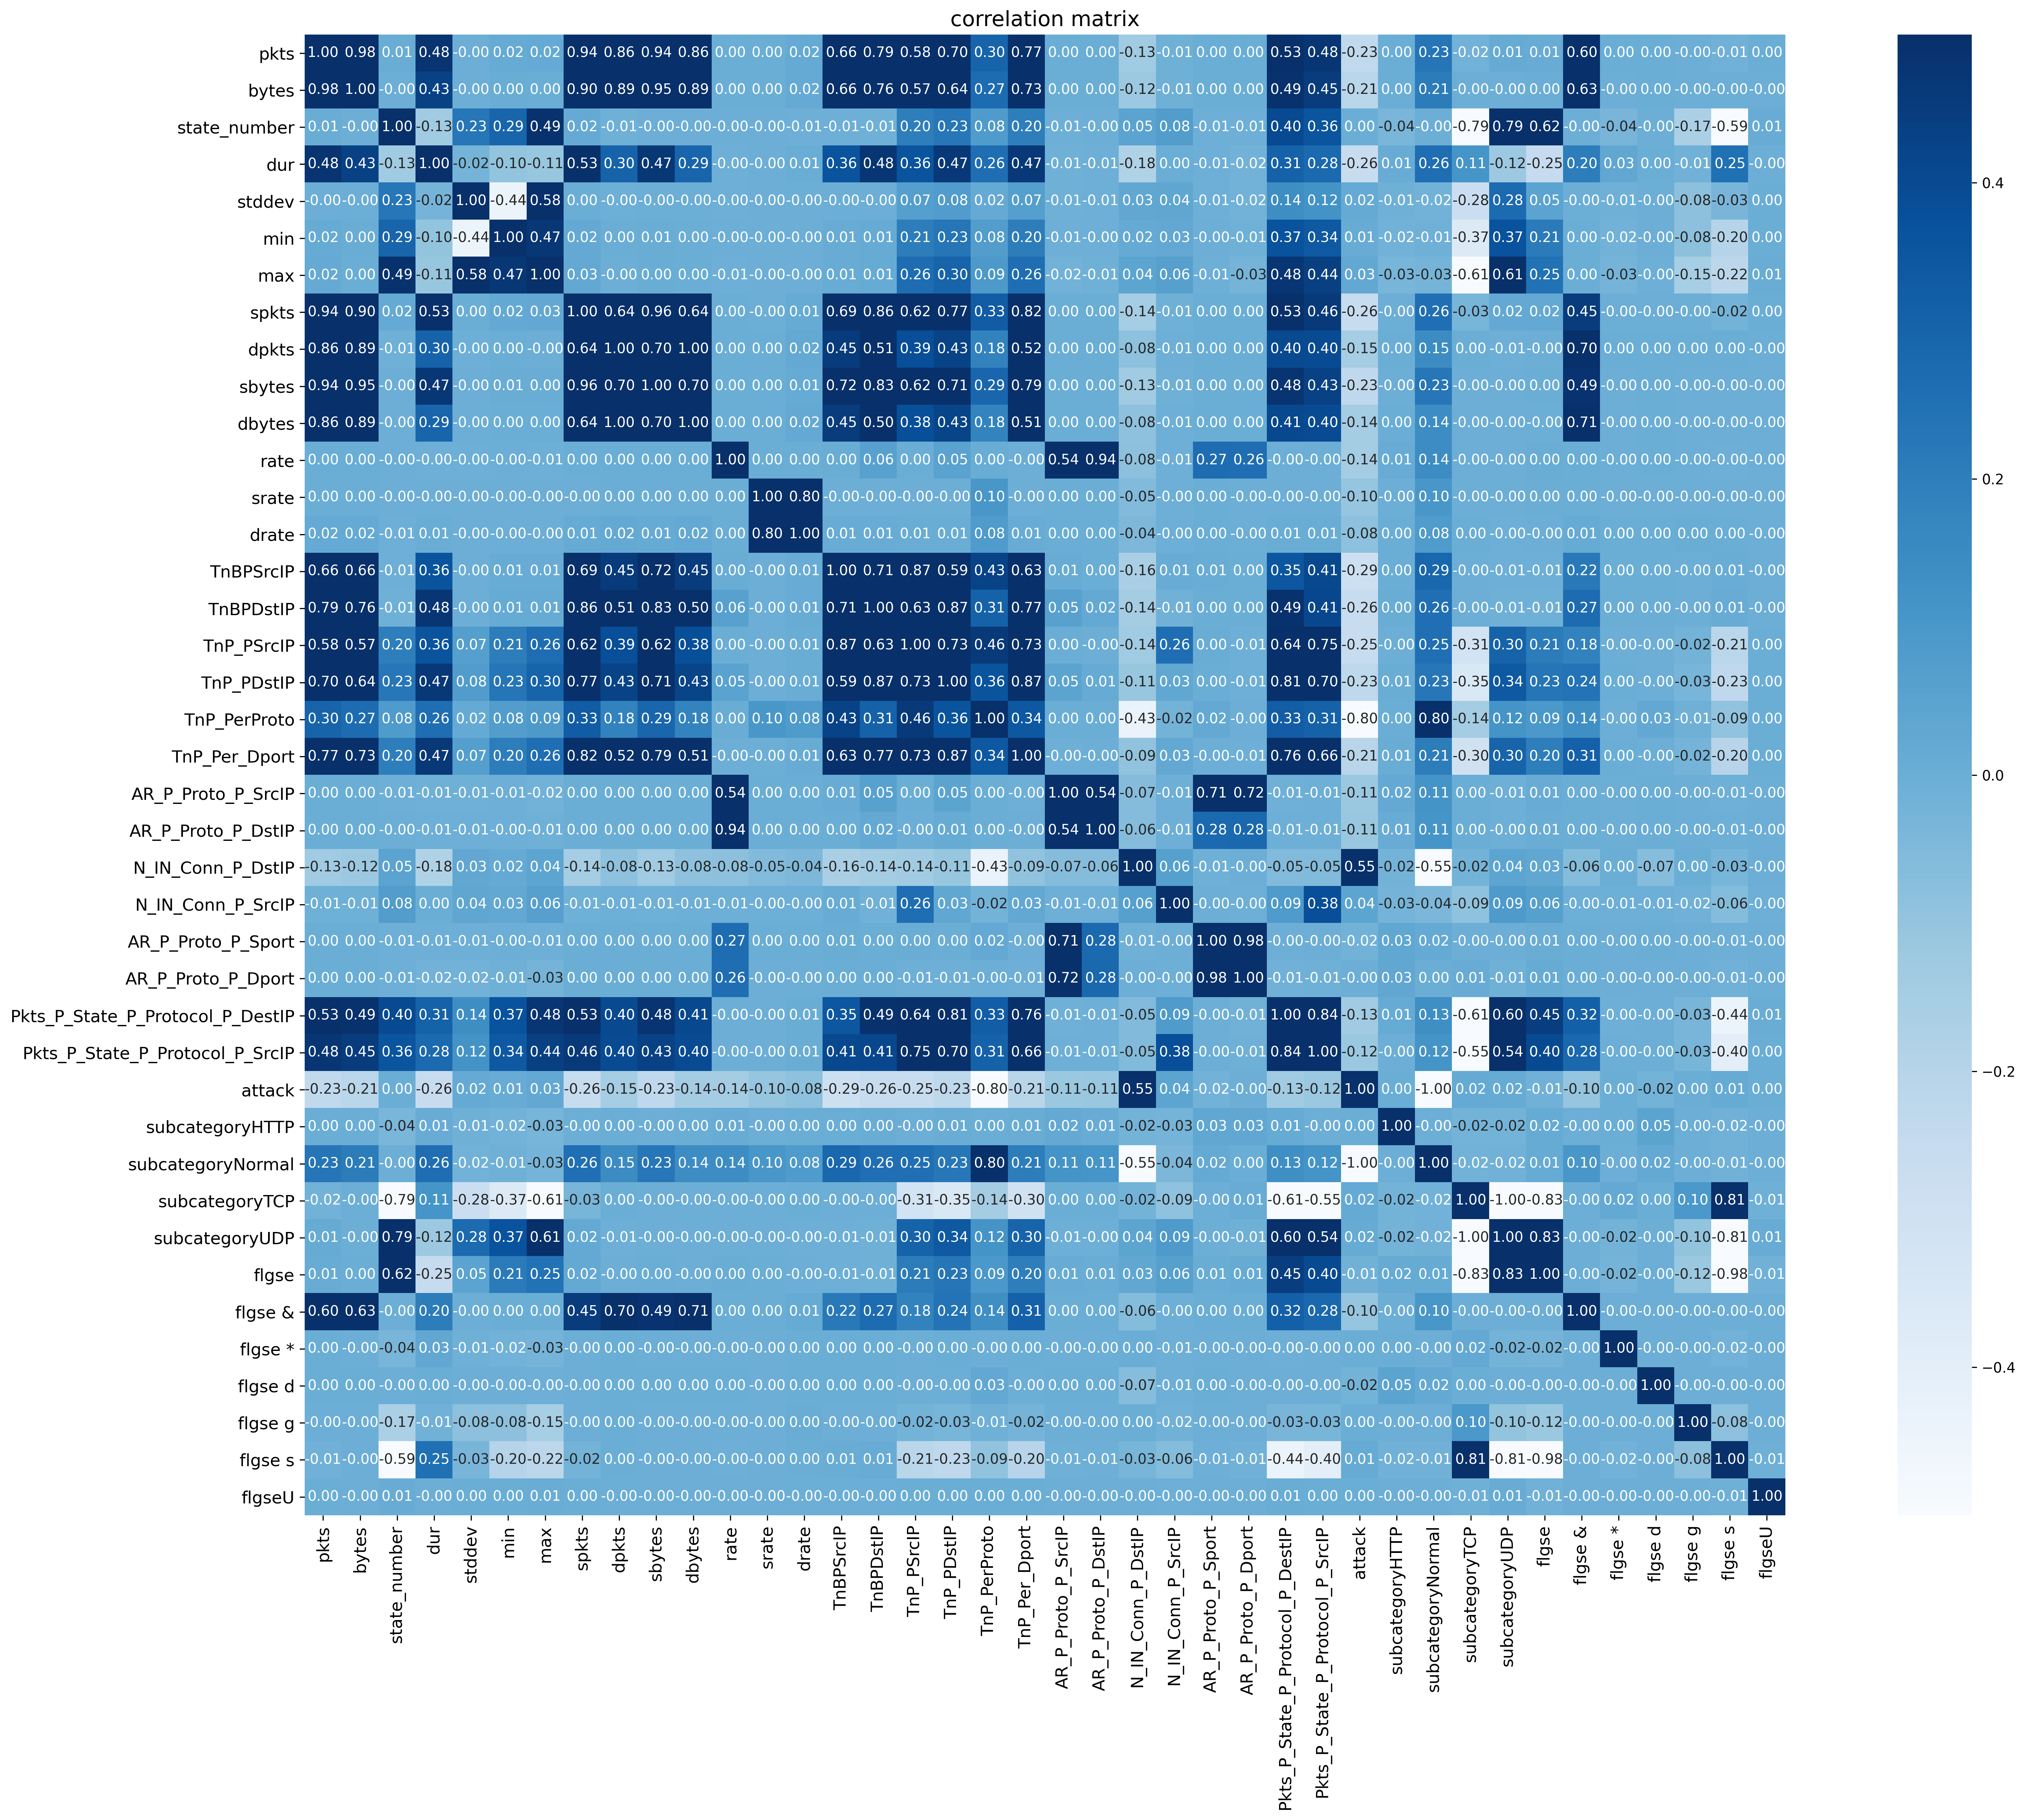

In [8]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(24, 18))

hm = sns.heatmap(df_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 10}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(df_corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(df_corr.columns, rotation=90, fontsize=12)
ax.set_yticks(ticks)
ax.set_yticklabels(df_corr.index, rotation=360, fontsize=12)

ax.set_title('correlation matrix', fontsize=15)
plt.tight_layout()
plt.savefig("heatmap.png", dpi=500)

Drop columns with high correlation (only one column between two columns)

In [9]:
cor_matrix = df_corr.abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['bytes', 'sbytes', 'dbytes', 'AR_P_Proto_P_Dport', 'subcategoryNormal', 'subcategoryUDP', 'flgse s']


In [10]:
df = df.drop(to_drop, axis=1)
df.head()

,pkts,state_number,dur,stddev,min,max,spkts,dpkts,rate,srate,drate,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,subcategoryHTTP,subcategoryTCP,flgse,flgse &,flgse *,flgse d,flgse g,flgseU
0,10,1,6.406424,0.544126,0.135347,1.223599,6,4,1.404840,0.780467,0.468280,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.56093,328,308,1,1,0,1,0,0,0,0,0
1,10,1,6.405851,0.544197,0.135375,1.223769,6,4,1.404966,0.780536,0.468322,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.56107,328,308,1,1,0,1,0,0,0,0,0
2,8,1,6.401038,1.110847,0.000000,2.221694,5,3,1.093573,0.624899,0.900214,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24980,328,308,1,1,0,1,0,0,0,0,0
3,8,1,6.400703,1.113328,0.000000,2.226655,5,3,1.093630,0.624931,0.898208,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24986,328,308,1,1,0,1,0,0,0,0,0
4,8,1,6.400472,1.113098,0.000000,2.226195,5,3,1.093669,0.624954,0.898394,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24991,328,308,1,1,0,1,0,0,0,0,0


## Data PreProcessing

Apply min-max-scaling on the data

In [11]:
from sklearn import preprocessing

cols = df.columns
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df.values)
df = pd.DataFrame(scaled_df, columns=cols)
df.head()

,pkts,state_number,dur,stddev,min,max,spkts,dpkts,rate,srate,drate,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,subcategoryHTTP,subcategoryTCP,flgse,flgse &,flgse *,flgse d,flgse g,flgseU
0,0.000128,0.0,0.003301,0.217933,0.027176,0.244720,0.000143,0.000114,0.000015,7.804670e-07,0.000215,0.000258,0.000272,0.001361,0.00145,0.001432,0.00286,0.000015,0.000007,0.393939,0.373737,0.000018,0.002906,0.002603,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000128,0.0,0.003301,0.217961,0.027181,0.244754,0.000143,0.000114,0.000015,7.805360e-07,0.000215,0.000258,0.000272,0.001361,0.00145,0.001432,0.00286,0.000015,0.000007,0.393939,0.373737,0.000018,0.002906,0.002603,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000100,0.0,0.003298,0.444915,0.000000,0.444339,0.000114,0.000086,0.000012,6.248990e-07,0.000413,0.000258,0.000272,0.001361,0.00145,0.001432,0.00286,0.000015,0.000007,0.393939,0.373737,0.000014,0.002906,0.002603,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000100,0.0,0.003298,0.445909,0.000000,0.445331,0.000114,0.000086,0.000012,6.249310e-07,0.000412,0.000258,0.000272,0.001361,0.00145,0.001432,0.00286,0.000015,0.000007,0.393939,0.373737,0.000014,0.002906,0.002603,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.000100,0.0,0.003298,0.445816,0.000000,0.445239,0.000114,0.000086,0.000012,6.249540e-07,0.000412,0.000258,0.000272,0.001361,0.00145,0.001432,0.00286,0.000015,0.000007,0.393939,0.373737,0.000014,0.002906,0.002603,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Splitting data to two sets, train data and test data, with proportion of 0.2

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(['attack'], axis=1)
y = df['attack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Checking ditribution in the target column of train and test dataset and then balancing train and test data

In [13]:
y_train.value_counts()

1.0    1541298
0.0        382
Name: attack, dtype: int64

In [14]:
y_test.value_counts()

1.0    385326
0.0        95
Name: attack, dtype: int64

In [15]:
to_be_added_to_train = round((0.3*(1541298+382) - 382) / (1-0.3))
print(to_be_added_to_train)

660174


In [16]:
to_be_added_to_test = round((0.3*(385326+95) - 95) / (1-0.3))
print(to_be_added_to_test)

165045


In [17]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
train = pd.concat([X_train, y_train], axis=1)

In [18]:
to_resample_train = train.loc[train['attack'] == 0.0]
our_resample = to_resample_train.sample(n=to_be_added_to_train, replace=True)
df_rebal_train = pd.concat([train, our_resample])

df_rebal_train['attack'].value_counts()

1.0    1541298
0.0     660556
Name: attack, dtype: int64

In [19]:
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
test = pd.concat([X_test, y_test], axis=1)

In [20]:
to_resample_test = test.loc[test['attack'] == 0.0]
our_resample = to_resample_test.sample(n=to_be_added_to_test, replace=True)
df_rebal_test = pd.concat([test, our_resample])

df_rebal_test['attack'].value_counts()

1.0    385326
0.0    165140
Name: attack, dtype: int64

In [21]:
X_train = df_rebal_train.drop(['attack'], axis=1)
y_train = df_rebal_train['attack']

In [22]:
X_test = df_rebal_test.drop(['attack'], axis=1)
y_test = df_rebal_test['attack']

## Models

Using random forest for classification

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

bag.fit(X_train.values, y_train.values.reshape(-1))

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [24]:
predictions = bag.predict(X_test.values)

In [25]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test.values.reshape(-1), predictions.reshape(-1)))

[[165140      0]
 [     0 385326]]


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test.values.reshape(-1), predictions.reshape(-1), target_names=['0.0', '1.0']))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    165140
         1.0       1.00      1.00      1.00    385326

    accuracy                           1.00    550466
   macro avg       1.00      1.00      1.00    550466
weighted avg       1.00      1.00      1.00    550466



In [27]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test.values.reshape(-1), predictions.reshape(-1), average='binary')

(1.0, 1.0, 1.0, None)

Using decision tree for calssification

In [28]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=1)

clf.fit(X_train.values, y_train.values.reshape(-1))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [29]:
predictions2 = clf.predict(X_test.values)

In [30]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test.values.reshape(-1), predictions.reshape(-1)))

[[165140      0]
 [     0 385326]]


In [31]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test.values.reshape(-1), predictions.reshape(-1)))

[[165140      0]
 [     0 385326]]


In [32]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test.values.reshape(-1), predictions.reshape(-1), average='binary')

(1.0, 1.0, 1.0, None)

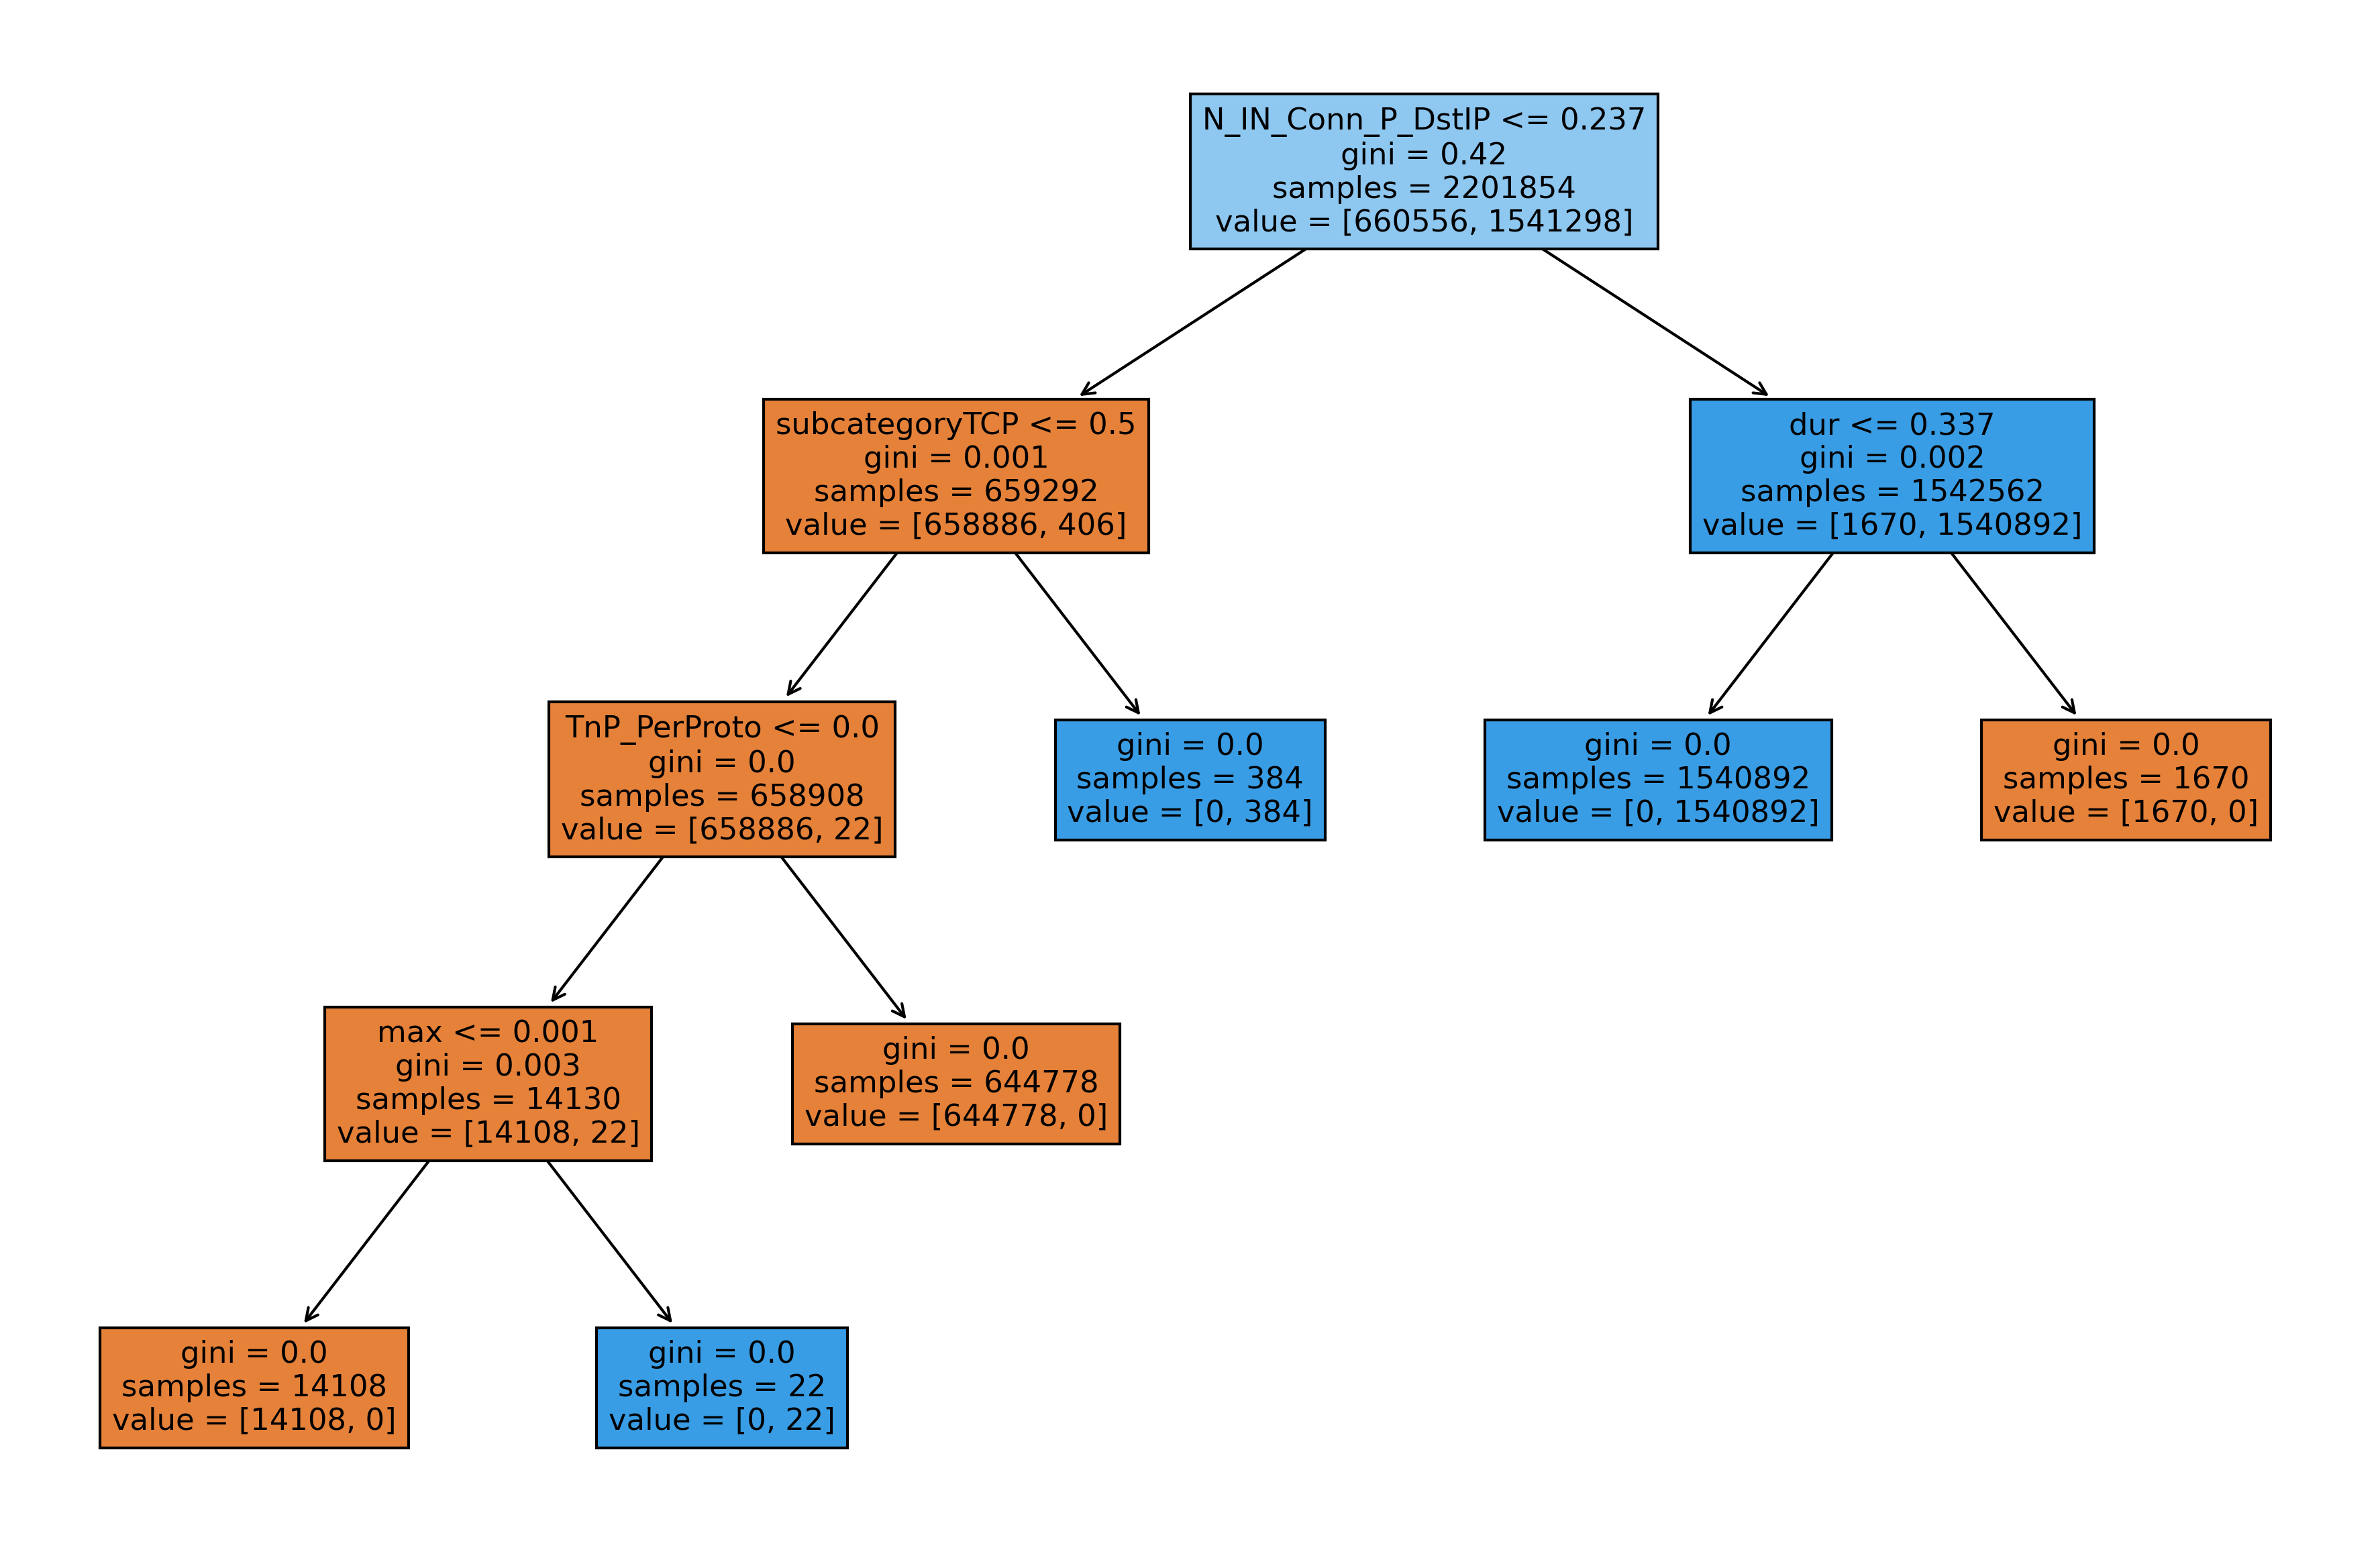

In [33]:
from sklearn import tree

fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(clf, feature_names=list(X_train.columns), filled=True)